<h1>
<center>
Dataquest Guided Project 5:
Visualizing earnings based on college majors 
</center>
</h1>

## Introduction

This is part of the Dataquest program.

- part of paths **Data Analyst in Python & Data Scientist in Python**
    - Step 2 : **Intermediate Python and Pandas**
        - Course 2 : **Exploratory Data Visualization **
            - Line charts
            - Multiple plots
            - Bar plots and scatter plots
            - Histograms and box plots

As it is part of the data visualization course, we will use basic matplotlib functionalities. As this is a guided project, we are following and deepening the steps suggested by Dataquest. 

## Use case : Visualizing earnings based on college majors 

We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by [American Community Survey](https://www.census.gov/programs-surveys/acs/), which conducts surveys and aggregates the data. [FiveThirtyEight](http://fivethirtyeight.com) cleaned the dataset and released it on their [Github repo](https://github.com/fivethirtyeight/data/tree/master/college-majors).

The data set has the following structure:


|Header|	Description|
|--------|-----------|
|Rank|	Rank by median earnings|
|Major_code|	Major code, FO1DP in ACS PUMS|
|Major|	Major description|
|Major_category|	Category of major from Carnevale et al|
|Total|	Total number of people with major|
|Sample_size|	Sample size (unweighted) of full-time, year-round ONLY (used for earnings)|
|Men|	Male graduates|
|Women|	Female graduates|
|ShareWomen|	Women as share of total|
|Employed|	Number employed (ESR == 1 or 2)|
|Full_time|	Employed 35 hours or more|
|Part_time|	Employed less than 35 hours|
|Full_time_year_round|	Employed at least 50 weeks (WKW == 1) and at least 35 hours (WKHP >= 35)|
|Unemployed|	Number unemployed (ESR == 3)|
|Unemployment_rate|	Unemployed / (Unemployed + Employed)|
|Median|	Median earnings of full-time, year-round workers|
|P25th|	25th percentile of earnigns|
|P75th|	75th percentile of earnings|
|College_jobs|	Number with job requiring a college degree|
|Non_college_jobs|	Number with job not requiring a college degree|
|Low_wage_jobs|	Number in low-wage service jobs|

## Load file and prepare data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")

Display the first row formatted as a table

In [3]:
recent_grads.iloc[0]

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object

Show the dataframe head and tail : 

In [4]:
recent_grads.head(1)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193


In [5]:
recent_grads.tail(1)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.87796,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


Generate summarystatistics for all of the numeric columns:

In [6]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


#### Drop rows with missing values 

Number of columns before cleaning:

In [7]:
raw_data_count = recent_grads.shape[0]

Drow rows containing missing values : 

In [8]:
recent_grads = recent_grads.dropna()

In [9]:
cleaned_data_count = recent_grads.shape[0]

How many row containing missing data was dropped?

In [10]:
raw_data_count - cleaned_data_count

1

## Scatter plots

Let's plot some scatter plots to understand the relationship between the columns:

### Sample_size and Median

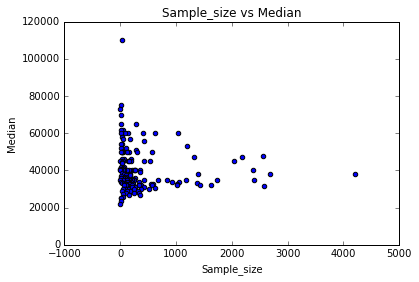

In [11]:
recent_grads.plot(x="Sample_size", y="Median", kind="scatter",
                  title = "Sample_size vs Median");

### Total and Median

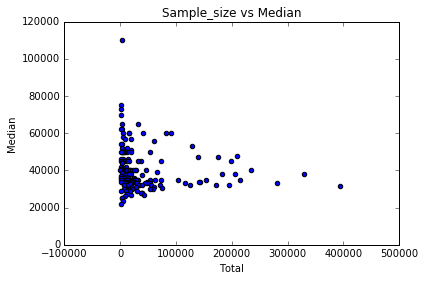

In [12]:
recent_grads.plot(x="Total", y="Median", kind="scatter",
                  title = "Sample_size vs Median");

### Sample_size and Unemployment_rate

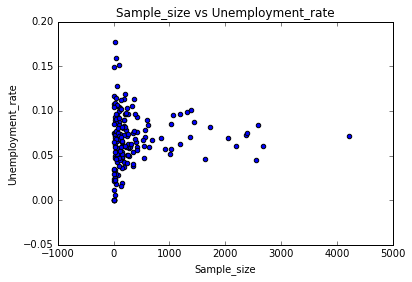

In [13]:
recent_grads.plot(x="Sample_size", y="Unemployment_rate", kind="scatter",
                  title = "Sample_size vs Unemployment_rate");

### Full_time and Median

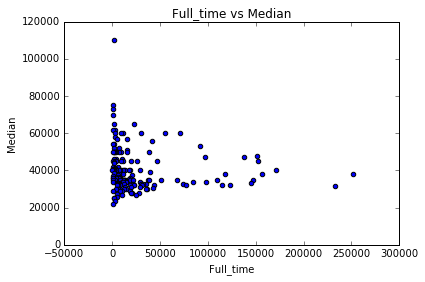

In [14]:
recent_grads.plot(x="Full_time", y="Median", kind="scatter",
                  title = "Full_time vs Median");

### ShareWomen and Unemployment_rate

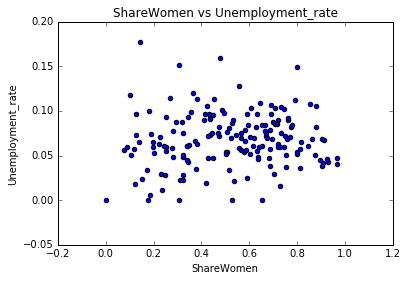

In [15]:
recent_grads.plot(x="ShareWomen", y="Unemployment_rate", kind="scatter",
                  title = "ShareWomen vs Unemployment_rate");

### Men and Median

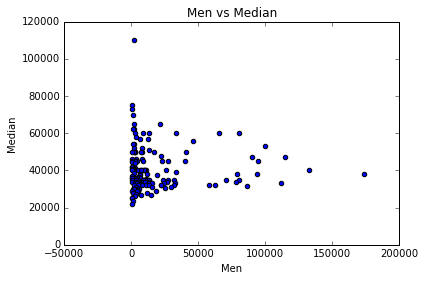

In [16]:
recent_grads.plot(x="Men", y="Median", kind="scatter",
                  title = "Men vs Median");

### Women and Median

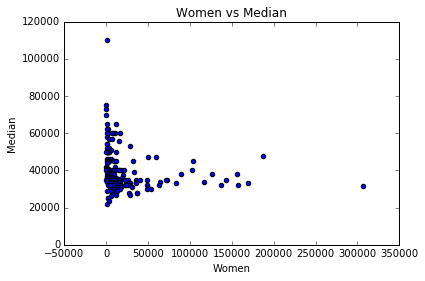

In [17]:
recent_grads.plot(x="Women", y="Median", kind="scatter",
                  title = "Women vs Median");

### Findings

#### Do students in more popular majors make more money?

We notice that there is (almost) no correlation between how popular a major is and how lucrative it is. 

#### Do students that majored in subjects that were majority female make more money?

As previously, we do not notice any correlation between the median income and the number of women in the major.

#### Is there any link between the number of full-time employees and median salary?

There is no link between the number of full-time employees and median salary.

As we have not found any correlations with the previous scatter plots, let's explore the data with a new tool: histograms. 

## Histograms

### Sample_size

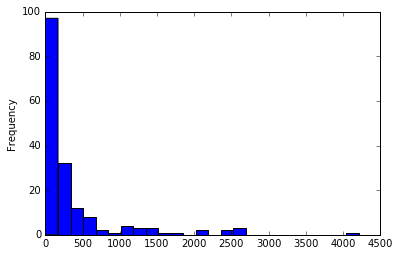

In [18]:
recent_grads['Sample_size'].plot(kind='hist', bins=25);

### Median

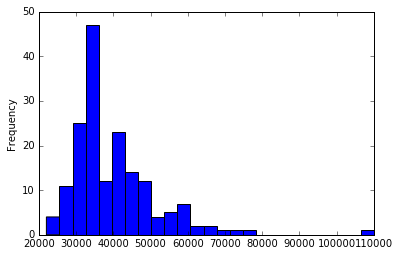

In [19]:
recent_grads['Median'].plot(kind='hist', bins=25);

### Employed

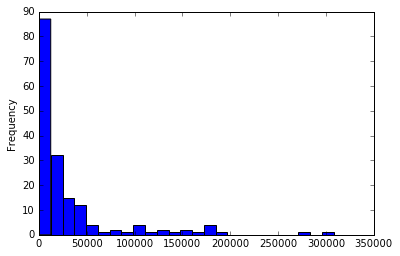

In [20]:
recent_grads['Employed'].plot(kind='hist', bins=25);

### Full_time

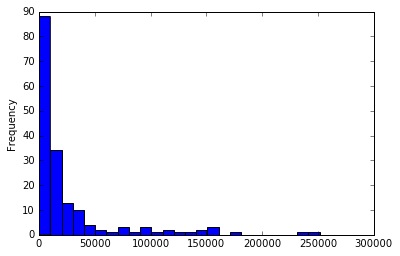

In [21]:
recent_grads['Full_time'].plot(kind='hist', bins=25);

### ShareWomen

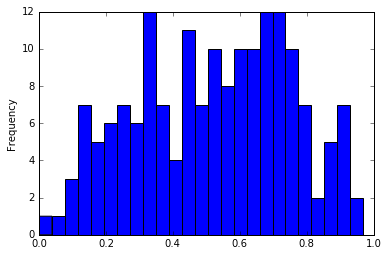

In [22]:
recent_grads['ShareWomen'].plot(kind='hist', bins=25);

### Unemployment_rate

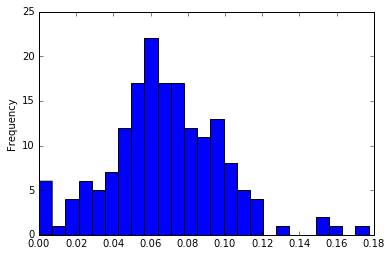

In [23]:
recent_grads['Unemployment_rate'].plot(kind='hist', bins=25);

### Men

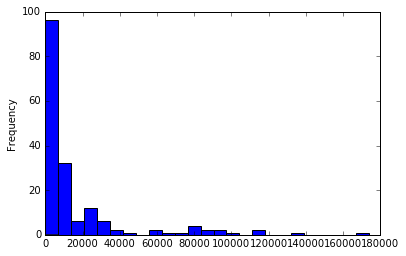

In [24]:
recent_grads['Men'].plot(kind='hist', bins=25);

### Women

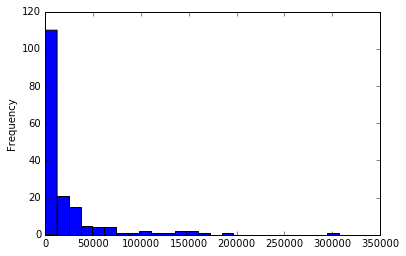

In [25]:
recent_grads['Women'].plot(kind='hist', bins=25)

These histograms do not help us much to understand the data. Scatter Matrix plots which combine scatter plots and histogram will help us to find some correlations. 

### Questions

#### What percent of majors are predominantly male? 

In [26]:
total = len(recent_grads)
most_men = len(recent_grads[recent_grads["ShareWomen"]<0.5])
most_women = len(recent_grads[recent_grads["ShareWomen"]>0.5])

most_men_part = most_men/total * 100
most_women_part = most_women/total * 100

print("%.2f" % most_men_part + "% of majors are predominantly male")
print("%.2f" % most_women_part + "% of majors are predominantly female")

44.19% of majors are predominantly male
55.81% of majors are predominantly female


#### What's the most common median salary range?

In [27]:
median = recent_grads["Median"].median()

print("The most common median salary range is around %.0f" % median + "$.")

The most common median salary range is around 36000$.


We could also have read it on the histogram, but this is less accurate.

## Scatter Matrix Plot

### Sample_size vs Median

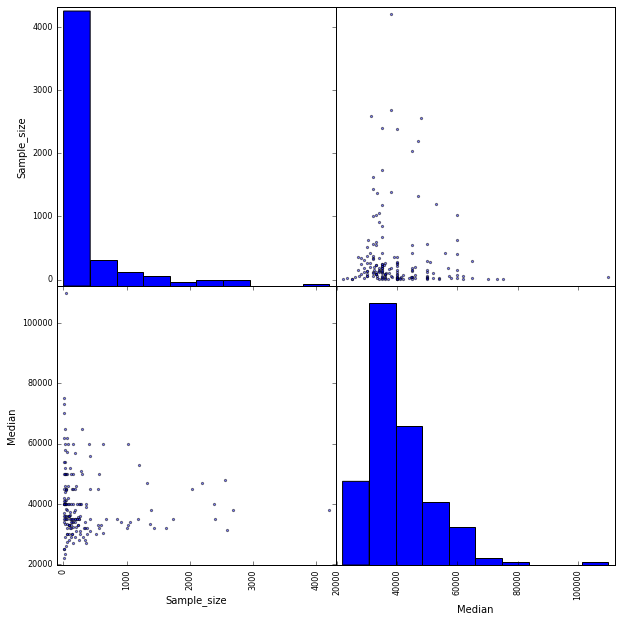

In [28]:
pd.scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10));

### Sample_size vs Median vs Unemployment_rate

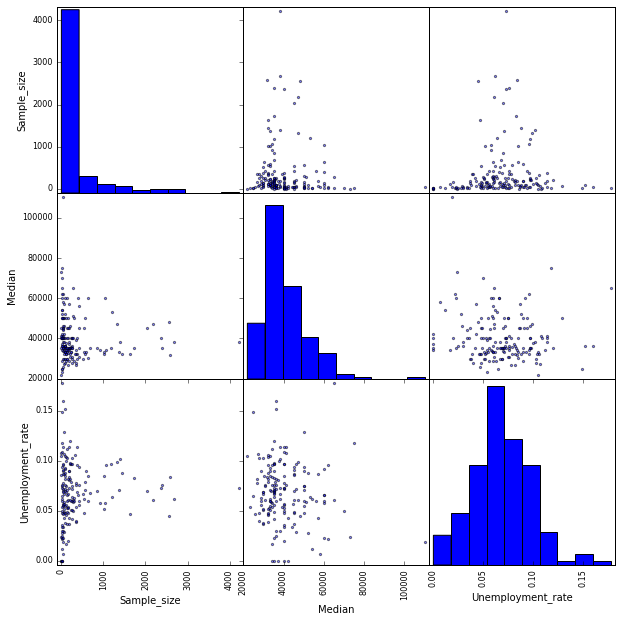

In [29]:
pd.scatter_matrix(recent_grads[["Sample_size", "Median", "Unemployment_rate"]], figsize=(10,10));

### Findings

Still, we don't notice any significant correlation between the data. 
We should focus on other columns to identify correlation. What could be interesting, for instance, is to understand what type of Major are mostly male or female. 
To do that, let's create bar plots.

## Bar Plots

#### Percent of women in highest and lowest paying majors

Let's use bar plots to compare the percentages of women from the 10 highest paying majors and from the 10 lowest paying major

In [30]:
recent_grads_sorted_descending = recent_grads.sort_values("Median", ascending=False)
recent_grads_sorted_ascending = recent_grads.sort_values("Median", ascending=True)

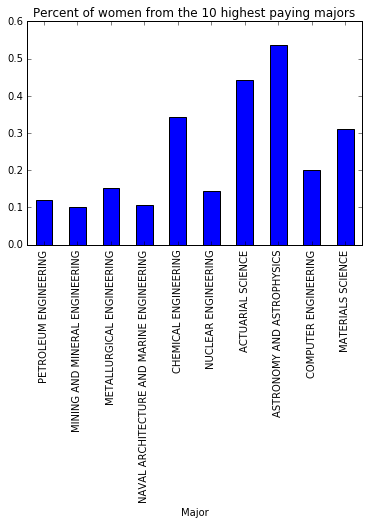

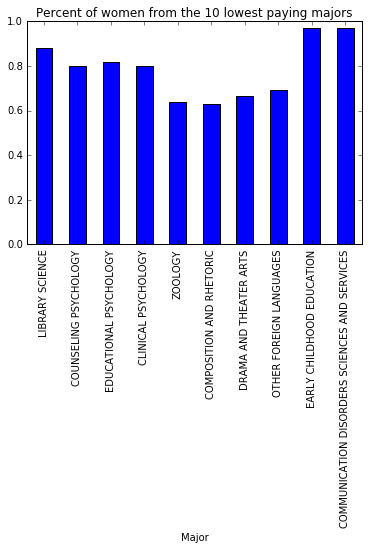

In [31]:
recent_grads_sorted_descending[:10].plot(kind="bar", x="Major", y="ShareWomen",
                                         legend=False,
                                        title="Percent of women from the 10 highest paying majors");
recent_grads_sorted_ascending[:10].plot(kind="bar", x="Major", y="ShareWomen",
                                        legend=False,
                                        title="Percent of women from the 10 lowest paying majors");

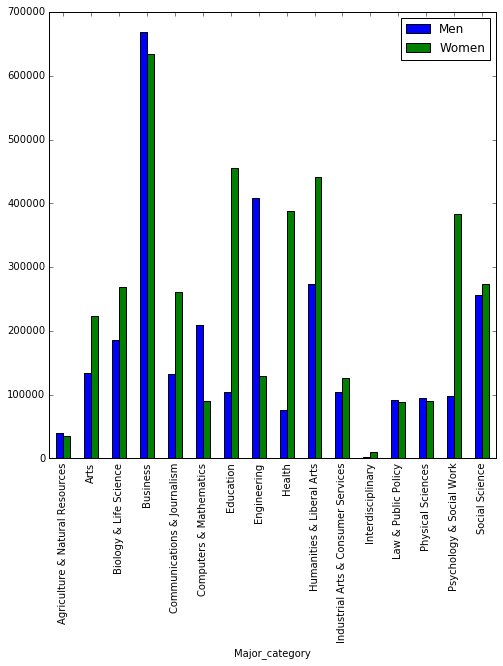

In [32]:
pivot = recent_grads.pivot_table(index="Major_category", values= ["Men", "Women"], aggfunc=np.sum)
pivot.plot(kind="bar", figsize=(8, 8));

### Findings

These bar plots are pretty clear: the Majors with the highest income are also the one with fewer women. 
This seems logic as, for the same job, women are less paid than men. Thus Majors that are in majority masculine have a higher income. Indeed, this article shows that *"According to data from the US Census Bureau, the average gender pay gap in the United States is around 19.5%, meaning that, on average, a woman earns 80.5% less than her male counterpart."* [source](http://www.businessinsider.com/gender-wage-pay-gap-charts-2017-3#the-gender-wage-gap-varies-widely-depending-on-the-state-1)

On top of that, we can notice that women tend to choose less engineering or scientific majors.  The fact that women don't want to work in science is another known issue. This [article](https://www.theguardian.com/commentisfree/2016/may/31/women-science-industry-structure-sexist-courses-careers) explains this is a cultural bias that has to be changed. 

This [paper](https://hbr.org/2017/04/women-dominate-college-majors-that-lead-to-lower-paying-work) details why women dominate college majors that lead to lower-paying jobs. 

#### Unemployment rate in highest and lowest paying majors

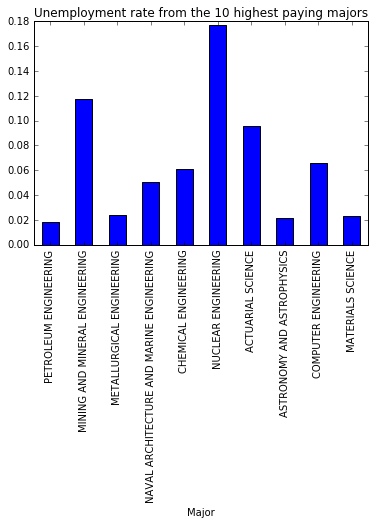

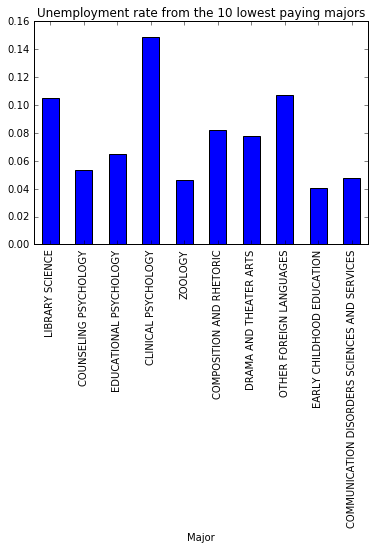

In [33]:
recent_grads_sorted_descending[:10].plot(kind="bar", x="Major", y="Unemployment_rate",
                                         legend=False,
                                        title="Unemployment rate from the 10 highest paying majors");
recent_grads_sorted_ascending[:10].plot(kind="bar", x="Major", y="Unemployment_rate",
                                        legend=False,
                                        title="Unemployment rate from the 10 lowest paying majors");

We are surprised to notice that there isn't any correlation between Median income and unemployment rate. For instance, nuclear engineers have one of the top ten highest paying job but also a high unemployment rate, because of the energy policy. 

The weak correlation likely reflects the fact that college graduates have a significant edge when it comes to finding jobs, regardless of what they major in.

## Box plots 

Let's use a boxplot to explore the distribution of median salaries and unemployment rate : 

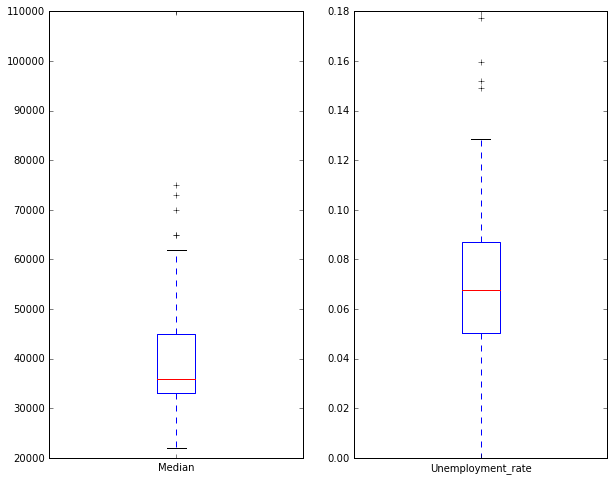

In [53]:
fig, ax = plt.subplots(1,2, figsize=(10,8))
recent_grads[["Median"]].plot(kind="box", ax=ax[0]);
recent_grads[["Unemployment_rate"]].plot(kind="box", ax=ax[1]);

Boxplots are really useful to see the dispersion of values. We can see that some major are crazy outliers (like Petroleum engineering).
The unemployment rate is spread between 0 and 0.18. We saw that nuclear engineering is one of the most paid major, but also the one with the highest unemployment rate. 